# ODI First Innings Score Prediction

In [1]:
import pandas as pd
import numpy as np
import pickle

### Loading the dataset
df = pd.read_csv('Dataset\odi.csv')

In [2]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_10,wickets_last_10,striker,non-striker,total
0,1,2006-06-13,"M.A. Chidambaram Stadium, Chennai",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"M.A. Chidambaram Stadium, Chennai",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"M.A. Chidambaram Stadium, Chennai",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"M.A. Chidambaram Stadium, Chennai",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"M.A. Chidambaram Stadium, Chennai",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [3]:
# Return size of dataset
df.shape

(22656, 15)

In [4]:
# Return different datatypes for each columns(float, int, string, bool, etc.)
df.dtypes

mid                  int64
date                object
venue               object
bat_team            object
bowl_team           object
batsman             object
bowler              object
runs                 int64
wickets              int64
overs              float64
runs_last_10         int64
wickets_last_10      int64
striker              int64
non-striker          int64
total                int64
dtype: object

In [5]:
# Return basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22656 entries, 0 to 22655
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mid              22656 non-null  int64  
 1   date             22656 non-null  object 
 2   venue            22656 non-null  object 
 3   bat_team         22656 non-null  object 
 4   bowl_team        22656 non-null  object 
 5   batsman          22656 non-null  object 
 6   bowler           22656 non-null  object 
 7   runs             22656 non-null  int64  
 8   wickets          22656 non-null  int64  
 9   overs            22656 non-null  float64
 10  runs_last_10     22656 non-null  int64  
 11  wickets_last_10  22656 non-null  int64  
 12  striker          22656 non-null  int64  
 13  non-striker      22656 non-null  int64  
 14  total            22656 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 2.6+ MB


In [6]:
# Return a coloumn having null values
df.isnull().sum()

mid                0
date               0
venue              0
bat_team           0
bowl_team          0
batsman            0
bowler             0
runs               0
wickets            0
overs              0
runs_last_10       0
wickets_last_10    0
striker            0
non-striker        0
total              0
dtype: int64

In [7]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid','batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [8]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_10,wickets_last_10,total
0,2006-06-13,"M.A. Chidambaram Stadium, Chennai",England,Ireland,0,0,0.1,0,0,301
1,2006-06-13,"M.A. Chidambaram Stadium, Chennai",England,Ireland,0,0,0.2,0,0,301
2,2006-06-13,"M.A. Chidambaram Stadium, Chennai",England,Ireland,4,0,0.3,4,0,301
3,2006-06-13,"M.A. Chidambaram Stadium, Chennai",England,Ireland,6,0,0.4,6,0,301
4,2006-06-13,"M.A. Chidambaram Stadium, Chennai",England,Ireland,6,0,0.5,6,0,301


In [9]:
df['bat_team'].unique()

array(['England', 'Pakistan', 'Sri Lanka', 'Australia', 'South Africa',
       'New Zealand', 'Bangladesh', 'West Indies', 'India', 'Zimbabwe',
       'Ireland', 'Scotland'], dtype=object)

In [10]:
# Keeping only consistent teams
consistent_teams = ['India', 'England', 'Pakistan', 'Sri Lanka', 'Australia', 'South Africa',
                     'New Zealand', 'Bangladesh', 'West Indies', 'Zimbabwe',]

In [11]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [12]:
# Removing the first 10 overs data in every match
df = df[df['overs']>=10.0]

In [13]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_10,wickets_last_10,total
377,2006-09-05,"Sardar Patel Stadium, Ahmedabad",England,Pakistan,54,1,10.1,25,0,271
378,2006-09-05,"Sardar Patel Stadium, Ahmedabad",England,Pakistan,57,1,10.2,27,0,271
379,2006-09-05,"Sardar Patel Stadium, Ahmedabad",England,Pakistan,61,1,10.3,31,0,271
380,2006-09-05,"Sardar Patel Stadium, Ahmedabad",England,Pakistan,61,1,10.4,27,0,271
381,2006-09-05,"Sardar Patel Stadium, Ahmedabad",England,Pakistan,61,1,10.5,26,0,271


In [14]:
print(df['bat_team'].unique())

['England' 'Pakistan' 'Sri Lanka' 'Australia' 'South Africa' 'New Zealand'
 'Bangladesh' 'West Indies' 'India' 'Zimbabwe']


In [15]:
print(df['bowl_team'].unique())

['Pakistan' 'England' 'Sri Lanka' 'South Africa' 'Australia' 'New Zealand'
 'India' 'West Indies' 'Bangladesh' 'Zimbabwe']


In [16]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

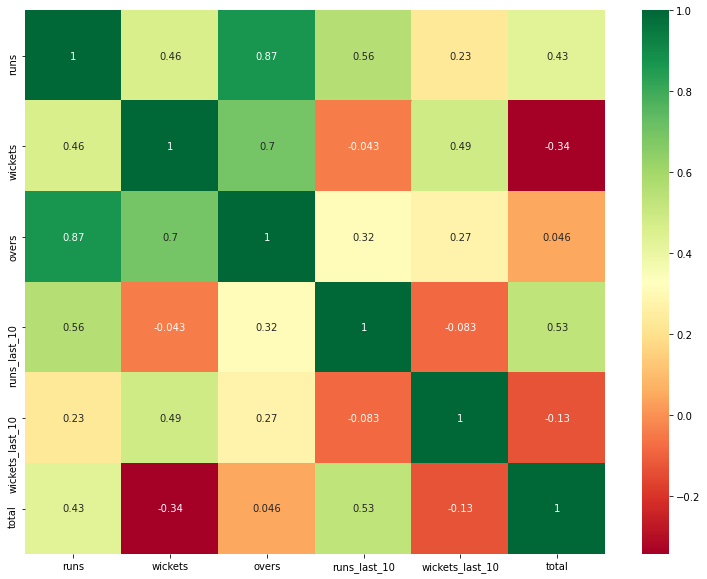

In [17]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [18]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team', 'venue'])

In [19]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_10,wickets_last_10,total,bat_team_Australia,bat_team_Bangladesh,bat_team_England,...,"venue_Mahinda Rajapaka International Stadium, Hambantota","venue_Punjab Cricket Association Stadium, Mohali","venue_R. Premadasa Stadium, Colombo","venue_Rajiv Gandhi International Stadium, Hyderabad","venue_Sardar Patel Stadium, Ahmedabad","venue_Sawai Mansingh Stadium, Rajasthan","venue_Shere Bangla National Stadium, Dhaka","venue_Vidarbha Cricket Association Stadium, Nagpur","venue_Wankhede Stadium, Mumbai","venue_Zahur Ahmed Chowdhury Stadium, Chattogram"
377,2006-09-05,54,1,10.1,25,0,271,0,0,1,...,0,0,0,0,1,0,0,0,0,0
378,2006-09-05,57,1,10.2,27,0,271,0,0,1,...,0,0,0,0,1,0,0,0,0,0
379,2006-09-05,61,1,10.3,31,0,271,0,0,1,...,0,0,0,0,1,0,0,0,0,0
380,2006-09-05,61,1,10.4,27,0,271,0,0,1,...,0,0,0,0,1,0,0,0,0,0
381,2006-09-05,61,1,10.5,26,0,271,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [20]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_10', 'wickets_last_10',
       'total', 'bat_team_Australia', 'bat_team_Bangladesh',
       'bat_team_England', 'bat_team_India', 'bat_team_New Zealand',
       'bat_team_Pakistan', 'bat_team_South Africa', 'bat_team_Sri Lanka',
       'bat_team_West Indies', 'bat_team_Zimbabwe', 'bowl_team_Australia',
       'bowl_team_Bangladesh', 'bowl_team_England', 'bowl_team_India',
       'bowl_team_New Zealand', 'bowl_team_Pakistan', 'bowl_team_South Africa',
       'bowl_team_Sri Lanka', 'bowl_team_West Indies', 'bowl_team_Zimbabwe',
       'venue_Eden Gardens Stadium, Kolkata',
       'venue_Feroz Shah Kotla Stadium, Delhi',
       'venue_H. P. C. A. Stadium, Dharamshala',
       'venue_M Chinnaswamy Stadium, Bangalore',
       'venue_M.A. Chidambaram Stadium, Chennai',
       'venue_Maharashtra Cricket Association Stadium, Pune',
       'venue_Mahinda Rajapaka International Stadium, Hambantota',
       'venue_Punjab Cricket Association St

In [21]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Australia', 'bat_team_Bangladesh',  'bat_team_England', 'bat_team_India', 'bat_team_New Zealand',
                         'bat_team_Pakistan', 'bat_team_South Africa', 'bat_team_Sri Lanka',  'bat_team_West Indies', 'bat_team_Zimbabwe', 
                         'bowl_team_Australia','bowl_team_Bangladesh', 'bowl_team_England', 'bowl_team_India', 'bowl_team_New Zealand',
                         'bowl_team_Pakistan', 'bowl_team_South Africa', 'bowl_team_Sri Lanka', 'bowl_team_West Indies', 'bowl_team_Zimbabwe',
                         'venue_M Chinnaswamy Stadium, Bangalore',  'venue_Punjab Cricket Association Stadium, Mohali',  'venue_Feroz Shah Kotla Stadium, Delhi', 'venue_Wankhede Stadium, Mumbai', 'venue_Eden Gardens Stadium, Kolkata',
                         'venue_Sawai Mansingh Stadium, Rajasthan', 'venue_Rajiv Gandhi International Stadium, Hyderabad',  'venue_M.A. Chidambaram Stadium, Chennai',  'venue_H. P. C. A. Stadium, Dharamshala',
                         'venue_Maharashtra Cricket Association Stadium, Pune', 'venue_Vidarbha Cricket Association Stadium, Nagpur',  'venue_Sardar Patel Stadium, Ahmedabad',         
                         'overs', 'runs', 'wickets', 'runs_last_10', 'wickets_last_10', 'total']]

In [22]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2006]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2007]

In [23]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2006]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2007]['total'].values

In [24]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# Linear Regression Model

In [25]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
odi_regressor = LinearRegression()
odi_regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
# Predicting results
y_pred_lr = odi_regressor.predict(X_test)

In [27]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 27.249411302604653
Mean Squared Error (MSE): 1017.3892062466269
Root Mean Squared Error (RMSE): 31.8965390951217


In [28]:
odi_regressor.score(X_train,y_train)*100

82.0745679471138

# Decision Tree Regression Model

In [29]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [31]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 40.88036809815951
Mean Squared Error (MSE): 2621.696319018405
Root Mean Squared Error (RMSE): 51.20250305422973


In [32]:
decision_regressor.score(X_train,y_train)*100

100.0

# Random Forest Regression Model

In [33]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [35]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 31.42527607361963
Mean Squared Error (MSE): 1692.1832044989774
Root Mean Squared Error (RMSE): 41.13615446901883


In [36]:
random_regressor.score(X_train,y_train)*100

99.98126032302866

# AdaBoost Model

In [37]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=odi_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [38]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [39]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 27.004606574315662
Mean Squared Error (MSE): 1048.1057506850132
Root Mean Squared Error (RMSE): 32.374461396060525


In [40]:
adb_regressor.score(X_train,y_train)*100

81.45871524998573

# PREDICTION FOR ODI MATCHES

In [41]:
def predict_score(batting_team='India', bowling_team='Pakistan', Venue='Wankhede Stadium, Mumbai', overs=12.3, runs=86, wickets=1, 
                  runs_in_prev_10=52, wickets_in_prev_10=2):
        temp_array = list()
        
        # batting_team
        if batting_team == 'India':
            temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0]
        elif batting_team == 'England':
            temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0]
        elif batting_team == 'Pakistan':
            temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0]
        elif batting_team == 'Sri Lanka':
            temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0]
        elif batting_team == 'Australia':
            temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0]
        elif batting_team == 'South Africa':
            temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0]
        elif batting_team == 'New Zealand':
            temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0]
        elif batting_team == 'Bangladesh':
            temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0]
        elif batting_team == 'West Indies':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0]
        elif batting_team == 'Zimbabwe':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1]    
            
            
        # bowling_team
        if bowling_team == 'India':
            temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0]
        elif bowling_team == 'England':
            temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0]
        elif bowling_team == 'Pakistan':
            temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0]
        elif bowling_team == 'Sri Lanka':
            temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0]
        elif bowling_team == 'Australia':
            temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0]
        elif bowling_team == 'South Africa':
            temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0]
        elif bowling_team == 'New Zealand':
            temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0]
        elif bowling_team == 'Bangladesh':
            temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0]
        elif bowling_team == 'West Indies':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0]
        elif bowling_team == 'Zimbabwe':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1]    


        # Venue
        if Venue == 'M Chinnaswamy Stadium, Bangalore':
            temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0,0,0]
        elif Venue == 'Punjab Cricket Association Stadium, Mohali':
            temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0,0,0]
        elif Venue == 'Feroz Shah Kotla Stadium, Delhi':
            temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0,0,0]
        elif Venue == 'Wankhede Stadium, Mumbai':
            temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0,0,0]
        elif Venue == 'Eden Gardens Stadium, Kolkata':
            temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0,0,0]
        elif Venue == 'Maharashtra Cricket Association Stadium, Pune':
            temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0,0,0]
        elif Venue == 'Vidarbha Cricket Association Stadium, Nagpur':
            temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0,0,0]
        elif Venue == 'Sawai Mansingh Stadium, Rajasthan':
            temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0,0,0]
        elif Venue == 'Rajiv Gandhi International Stadium, Hyderabad':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0,0,0]
        elif Venue == 'M.A. Chidambaram Stadium, Chennai':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1,0,0]
        elif Venue == 'H. P. C. A. Stadium, Dharamshala':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,1,0]
        elif Venue == 'Sardar Patel Stadium, Ahmedabad':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,1]    
            
        # Overs, Runs, Wickets, Runs_in_prev_10, Wickets_in_prev_10      
        temp_array = temp_array +[overs, runs, wickets, runs_in_prev_10, wickets_in_prev_10]
        
         # Converting into numpy array
        data = np.array([temp_array])
        
        # Prediction
        return int(odi_regressor.predict(data)[0])

# Prediction 1:

In [42]:
final_score = predict_score(batting_team='India', bowling_team='Australia', Venue='Feroz Shah Kotla Stadium, Delhi', 
                            overs=10.3, runs=79, wickets=2, runs_in_prev_10=80, wickets_in_prev_10=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 297 to 312


# Prediction 2:

In [43]:
final_score = predict_score(batting_team='England', bowling_team='New Zealand', Venue='M Chinnaswamy Stadium, Bangalore', 
                            overs=10.5, runs=86, wickets=3, runs_in_prev_10=55, wickets_in_prev_10=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 194 to 209


# Prediction 3:

In [44]:
final_score = predict_score(batting_team='Pakistan', bowling_team='South Africa', Venue='Sawai Mansingh Stadium, Rajasthan', 
                            overs=15.2, runs=102, wickets=3, runs_in_prev_10=89, wickets_in_prev_10=3)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 317 to 332


# Prediction 4:

In [45]:
final_score = predict_score(batting_team='India', bowling_team='New Zealand', Venue='Maharashtra Cricket Association Stadium, Pune', 
                            overs=13.2, runs=102, wickets=1, runs_in_prev_10=89, wickets_in_prev_10=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 313 to 328


# Prediction 5:

In [46]:
final_score = predict_score(batting_team='Sri Lanka', bowling_team='West Indies', Venue='Sardar Patel Stadium, Ahmedabad', 
                            overs=11.5, runs=102, wickets=0, runs_in_prev_10=89, wickets_in_prev_10=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 223 to 238
